<a href="https://colab.research.google.com/github/GDharan10/Project7_RetailSalsesForecast/blob/main/Copy_of_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install dataprep

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#from dataprep.eda import create_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Features_Data = pd.read_csv("/content/drive/MyDrive/Data Set/Features_data_set.csv")
Sales_Data = pd.read_csv("/content/drive/MyDrive/Data Set/sales_data_set.csv")
Stores_Data = pd.read_csv("/content/drive/MyDrive/Data Set/stores_data_set.csv")

In [ ]:
Features_Data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
Features_Data.tail()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
Features_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
Sales_Data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
Sales_Data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [ ]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
Stores_Data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
Stores_Data.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
Stores_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
Stores_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [ ]:
Stores_Data.Type.describe().T

count     45
unique     3
top        A
freq      22
Name: Type, dtype: object

In [ ]:
df = pd.merge(Stores_Data, Sales_Data, on='Store', how='outer')
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [ ]:
df1 = pd.merge(df, Features_Data, on=['Store','Date'], how='outer')
df1.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
423320,45,NaN,NaN,NaN,28/06/2013,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
423324,45,NaN,NaN,NaN,26/07/2013,NaN,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
df1.Date=pd.to_datetime(df1.Date, format="%d/%m/%Y")

In [ ]:
df1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
df1.Date.unique()

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-03-05T00:00:00.000000000', '2010-03-12T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-04-02T00:00:00.000000000', '2010-04-09T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13

In [ ]:
df1.drop(df1[df1['Date'] > '2012-11-01'].index, inplace=True)

In [ ]:
df1.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,B,118221.0,93.0,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,B,118221.0,94.0,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,B,118221.0,95.0,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,B,118221.0,97.0,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,B,118221.0,98.0,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [ ]:
df1.Date.unique()

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-03-05T00:00:00.000000000', '2010-03-12T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-04-02T00:00:00.000000000', '2010-04-09T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13

# **EDA**

In [ ]:
df1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
df1.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,B,118221.0,93.0,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,B,118221.0,94.0,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,B,118221.0,95.0,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,B,118221.0,97.0,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,B,118221.0,98.0,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  object        
 2   Size          421570 non-null  float64       
 3   Dept          421570 non-null  float64       
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday_x   421570 non-null  object        
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [ ]:
df1.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [ ]:
continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday_x", "IsHoliday_y", "Dept"]

string_columns = df1.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
numeric_columns = df1.select_dtypes(include=['int64',"float64"]).columns

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [ ]:
df1[string_columns].describe().T

,count,unique,top,freq
Type,421570,3,A,215478
IsHoliday_x,421570,2,False,391909
IsHoliday_y,421570,2,False,391909


In [ ]:
df1.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

# **Correlation**

In [ ]:
df1[numeric_columns].corr()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.182881,0.024004,-0.085195,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Size,-0.182881,1.000000,-0.002966,0.243828,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Dept,0.024004,-0.002966,1.000000,0.148032,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.243828,0.148032,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
Temperature,-0.050097,-0.058313,0.004437,-0.002312,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003361,0.003572,-0.000120,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,0.345673,-0.002426,0.085251,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.108827,0.000290,0.024130,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.048913,0.001784,0.060385,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818
MarkDown4,-0.009941,0.168196,0.004257,0.045414,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963


In [ ]:
string_columns

Index(['Type', 'IsHoliday_x', 'IsHoliday_y'], dtype='object')

In [ ]:
df2=df1.copy()

In [ ]:
encode=LabelEncoder()

for column in string_columns:
  encode.fit(df2[[column]])
  df2[column] = encode.transform(df2[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [ ]:
df2.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,0,151315.0,1.0,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,0,151315.0,2.0,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,1,0,151315.0,3.0,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,1,0,151315.0,4.0,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,1,0,151315.0,5.0,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0


In [ ]:
correlation_matrix = df2.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-36-7285f3a629c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


In [ ]:
# Generating an EDA report using dataprep.eda for DataFrame df.
# create_report(df1)

In [ ]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

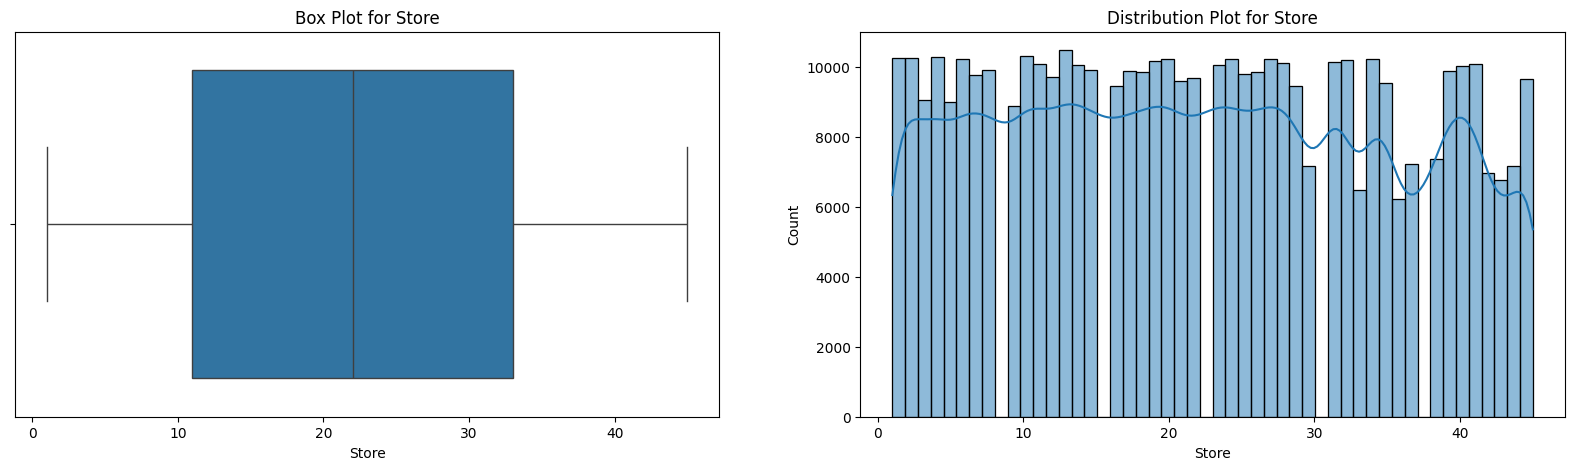

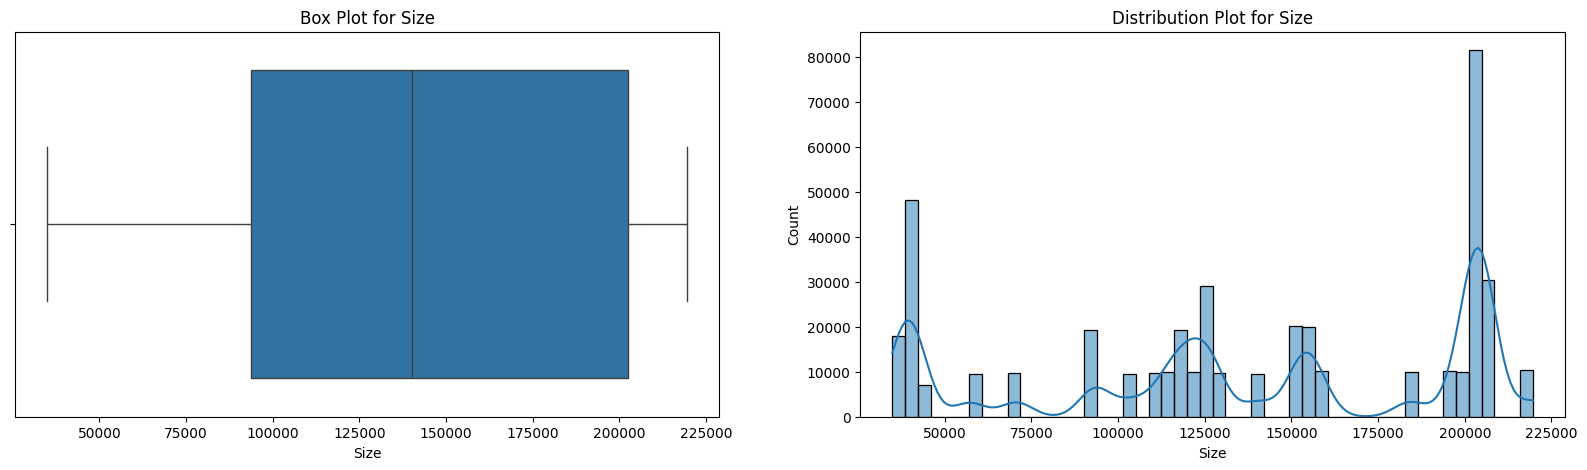

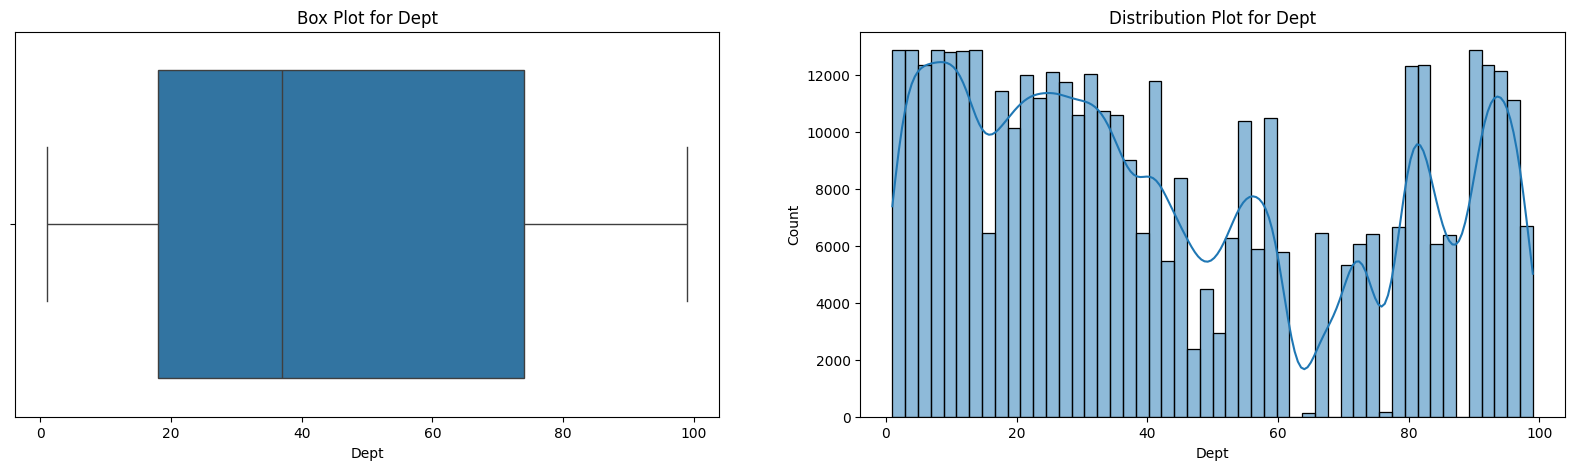

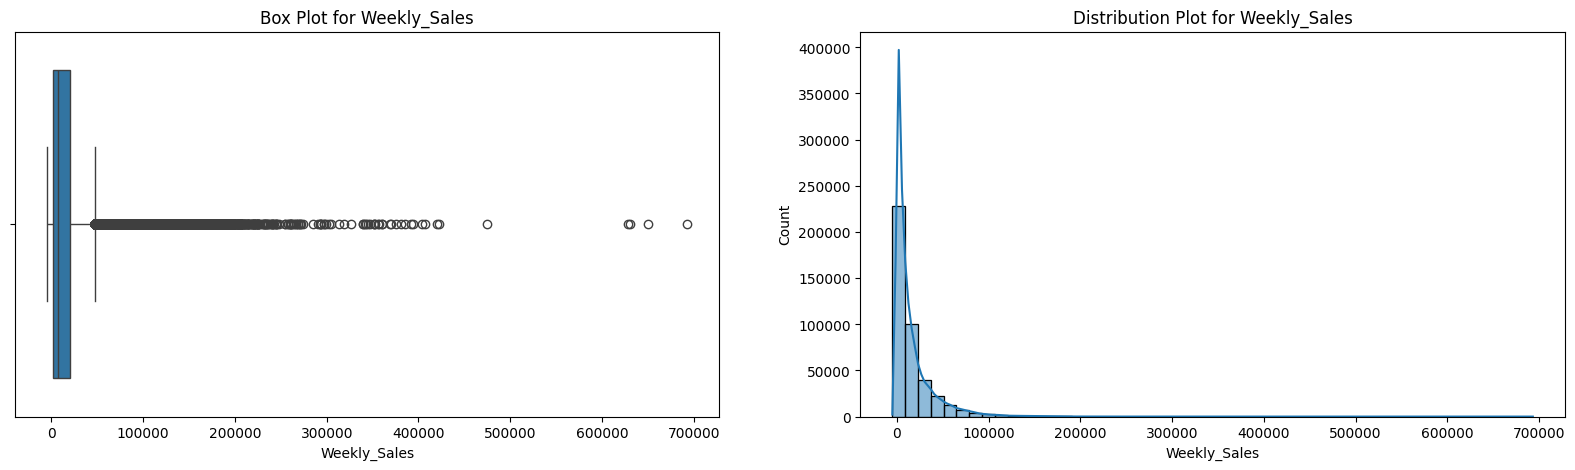

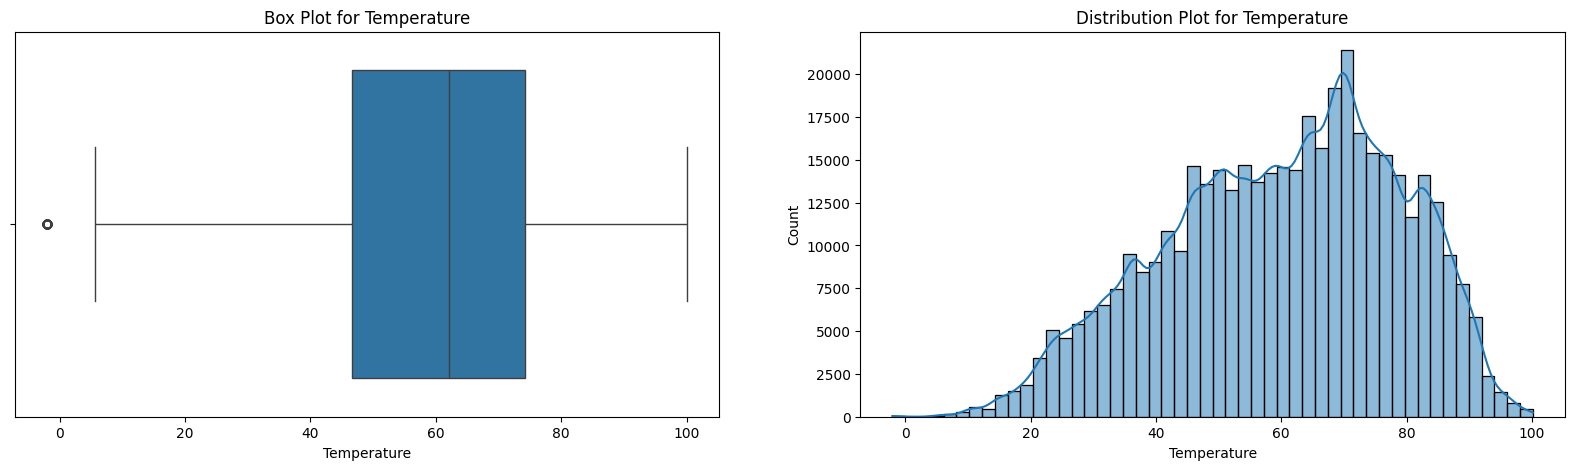

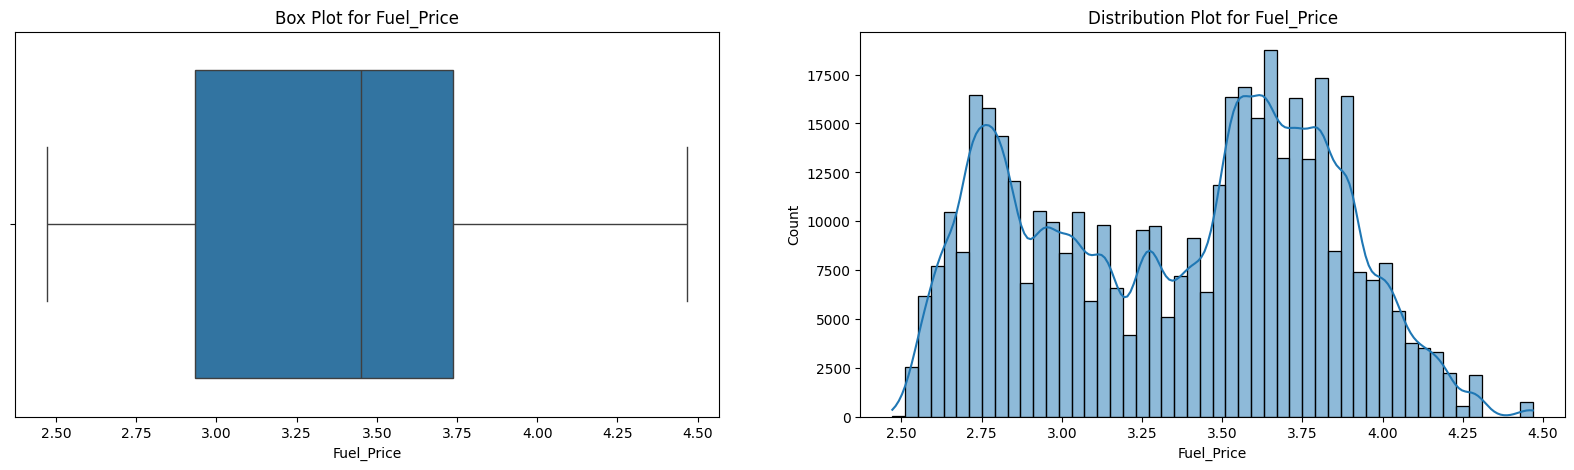

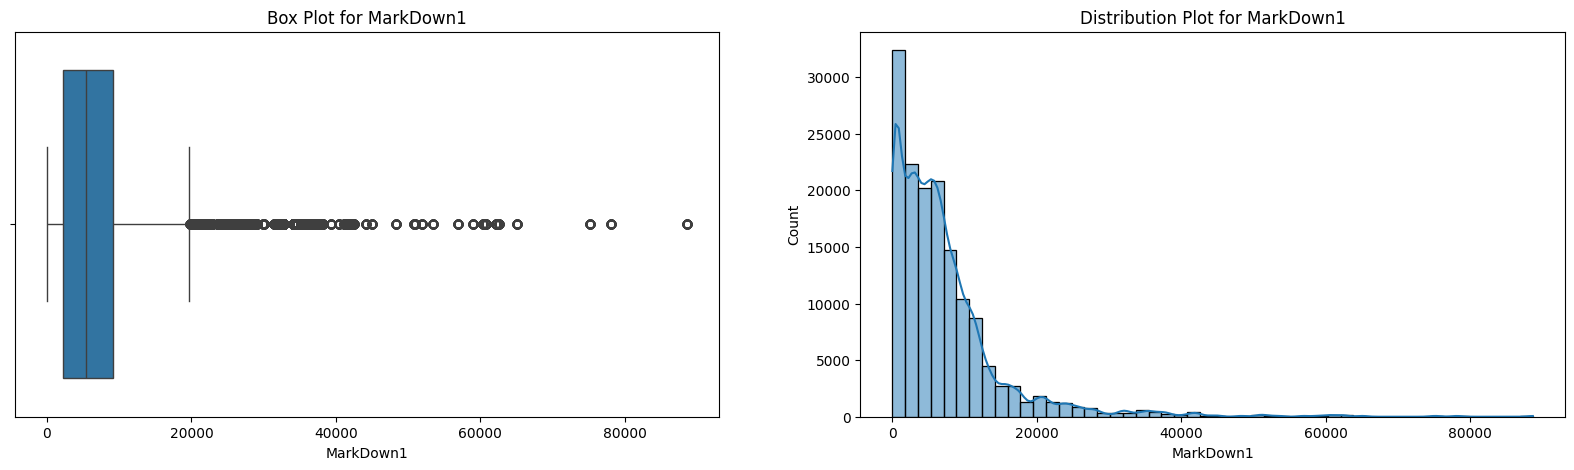

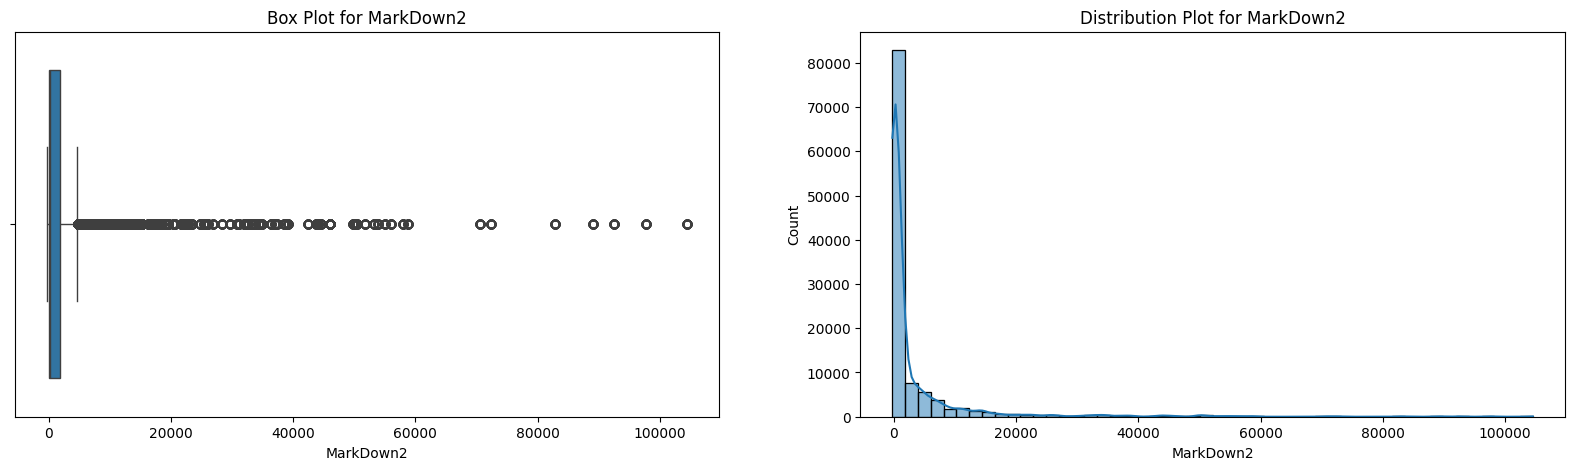

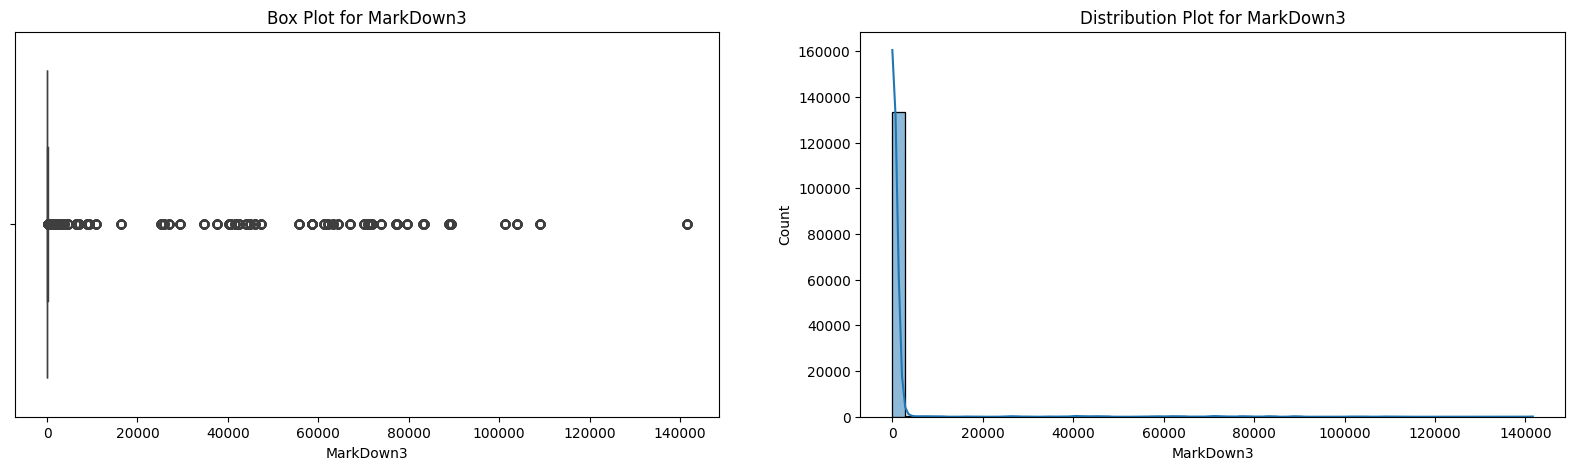

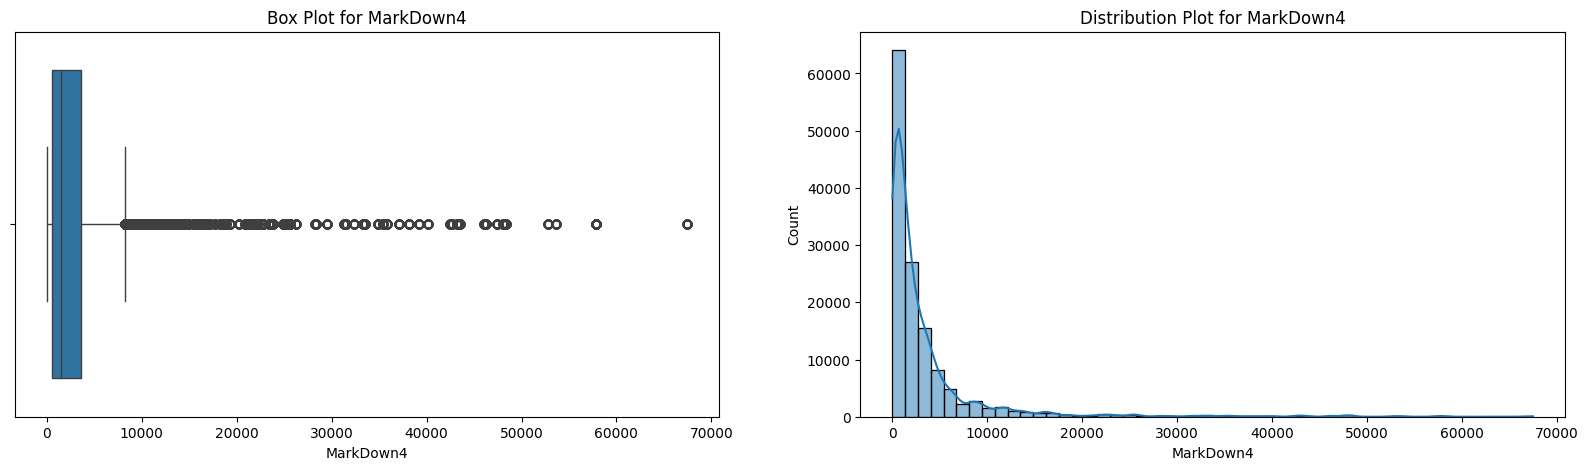

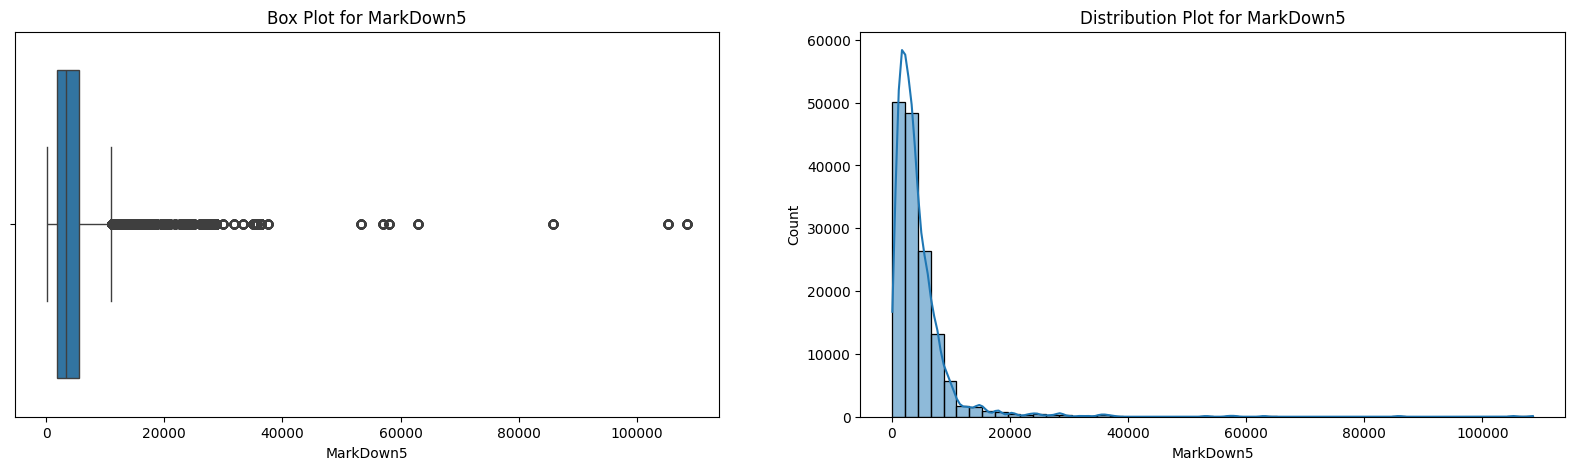

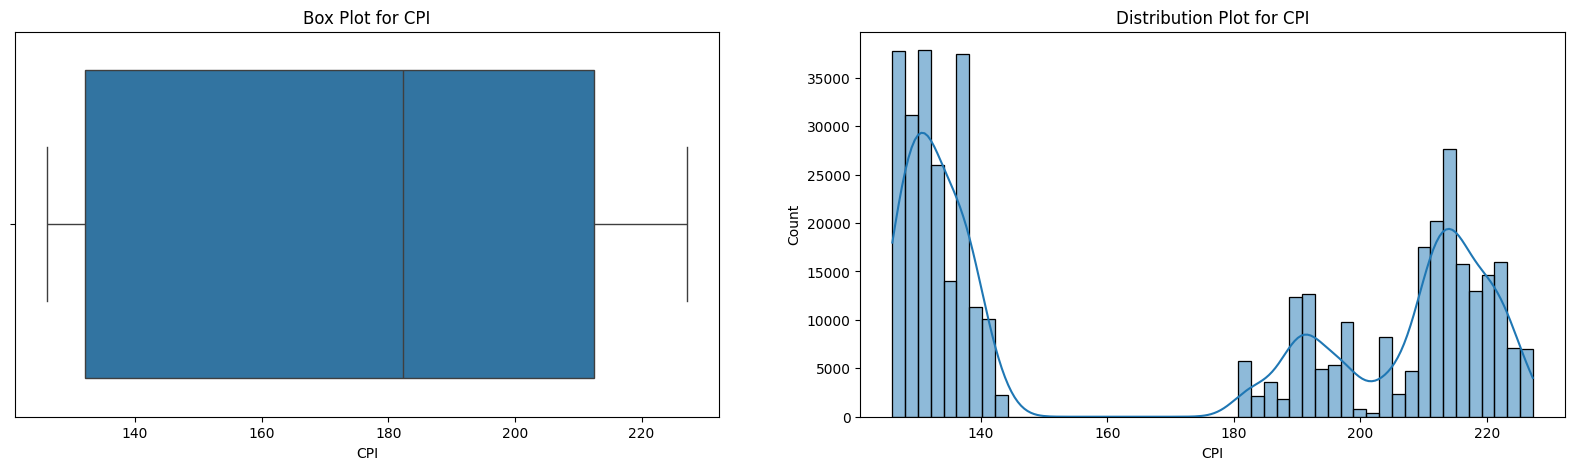

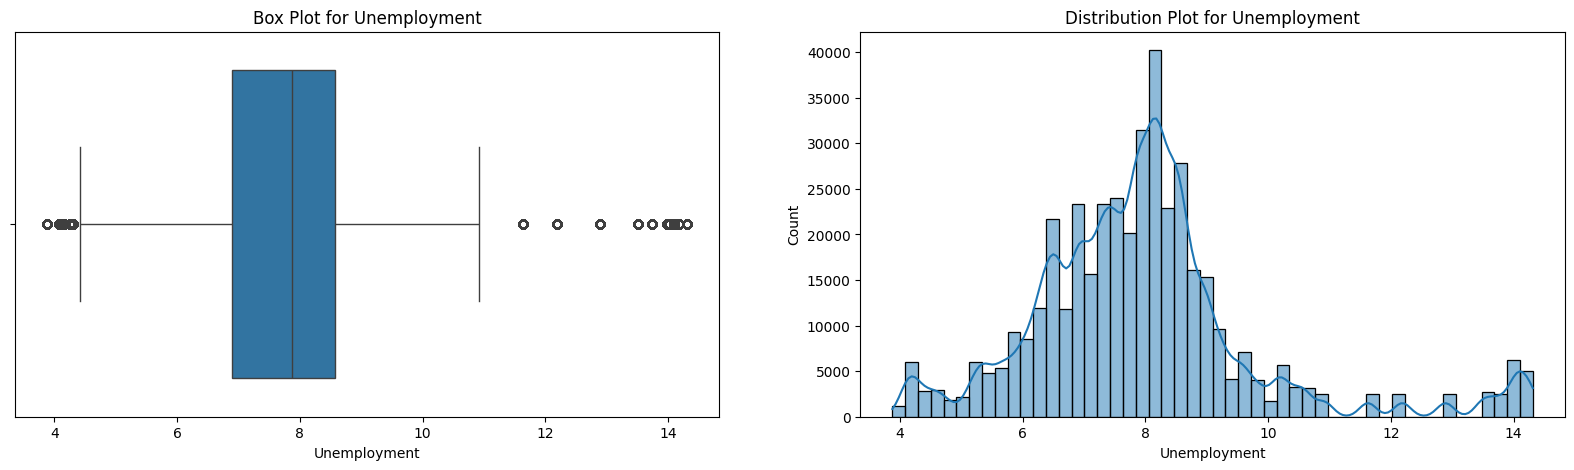

In [ ]:
for i in numeric_columns:
    plot(df1, i)

# **Data Preprocessing**

In [ ]:
df1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
#Cleaning
df1.duplicated().sum()


0

In [ ]:
df1.IsHoliday_x.value_counts()

False    391909
True      29661
Name: IsHoliday_x, dtype: int64

In [ ]:
df1.IsHoliday_y.value_counts()

False    391909
True      29661
Name: IsHoliday_y, dtype: int64

In [ ]:
df1= df1.drop(columns=['IsHoliday_x'])

In [ ]:
df1.shape

(421570, 16)

In [ ]:
df1.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [ ]:
Markdown1=270889/421570
Markdown2=310322/421570
Markdown3=284479/421570
Markdown4=286603/421570
Markdown5=270138/421570

print(Markdown1,Markdown2,Markdown3,Markdown4,Markdown5)

0.6425718148824632 0.7361102545247528 0.6748084541120098 0.6798467632896079 0.6407903788220224


In [ ]:
# Markdown=(df1.MarkDown1+df1.MarkDown2+df1.MarkDown3+df1.MarkDown4+df1.MarkDown5)
# Markdown = df1[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)
# len(Markdown==0)

In [ ]:
df1.MarkDown1.fillna(0, inplace = True)
df1.MarkDown2.fillna(0, inplace = True)
df1.MarkDown3.fillna(0, inplace = True)
df1.MarkDown4.fillna(0, inplace = True)
df1.MarkDown5.fillna(0, inplace = True)

In [ ]:
df1.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [ ]:
df1['month'] = df1['Date'].dt.month
df1['year'] = df1['Date'].dt.year
df1['day'] = df1['Date'].dt.day
df1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,month,year,day
0,1,A,151315.0,1.0,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,A,151315.0,2.0,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
2,1,A,151315.0,3.0,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
3,1,A,151315.0,4.0,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
4,1,A,151315.0,5.0,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
df1= df1.drop(columns=['Date'])

In [ ]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
outlier(df1, 'Unemployment')

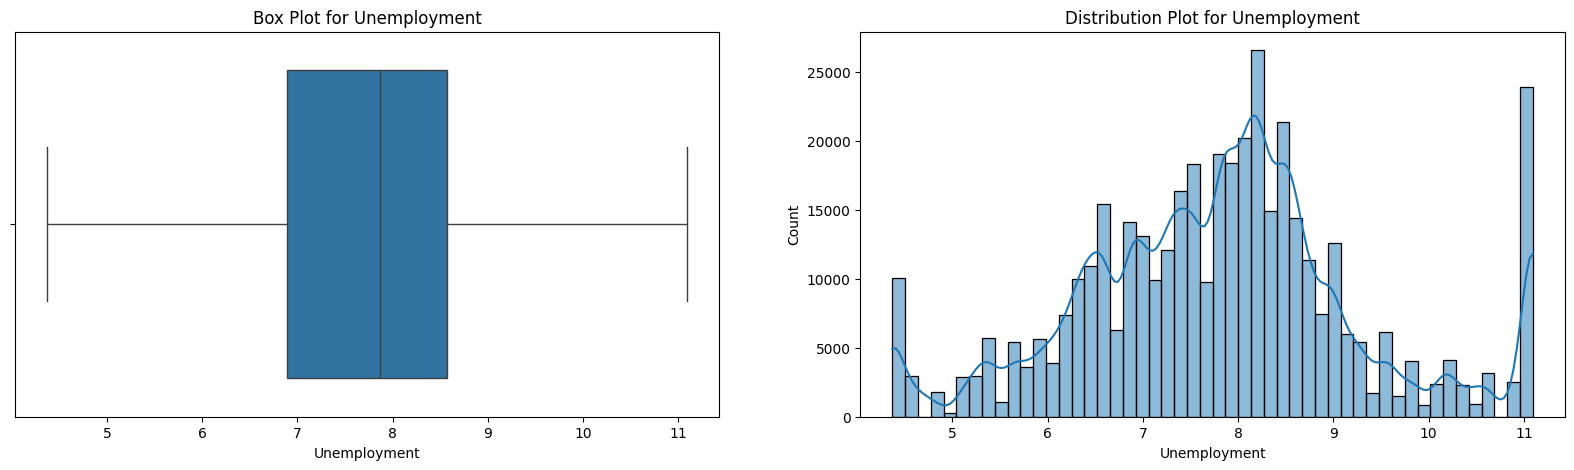

In [ ]:
plot(df1, 'Unemployment')

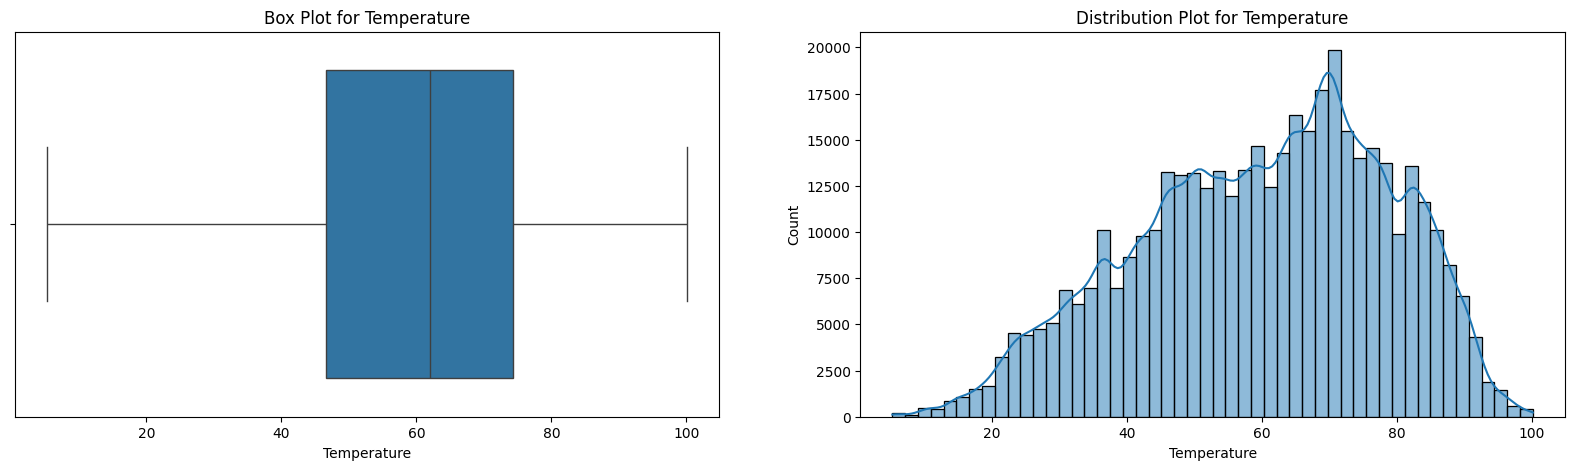

In [ ]:
outlier(df1, 'Temperature')
plot(df1, 'Temperature')

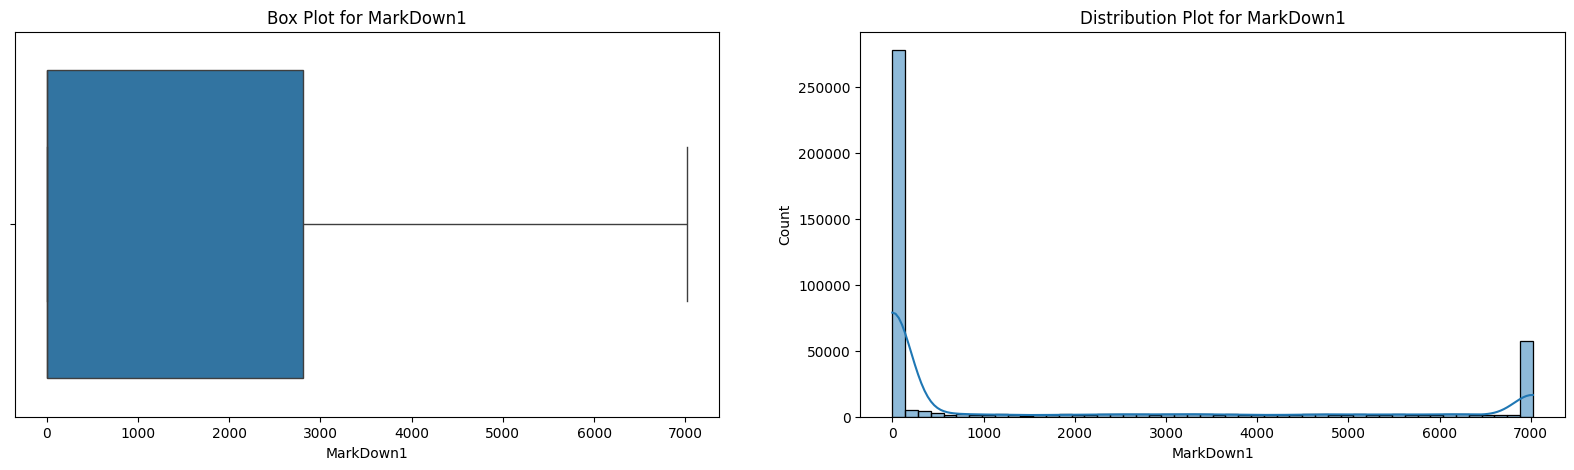

In [ ]:
outlier(df1, 'MarkDown1')
plot(df1, 'MarkDown1')

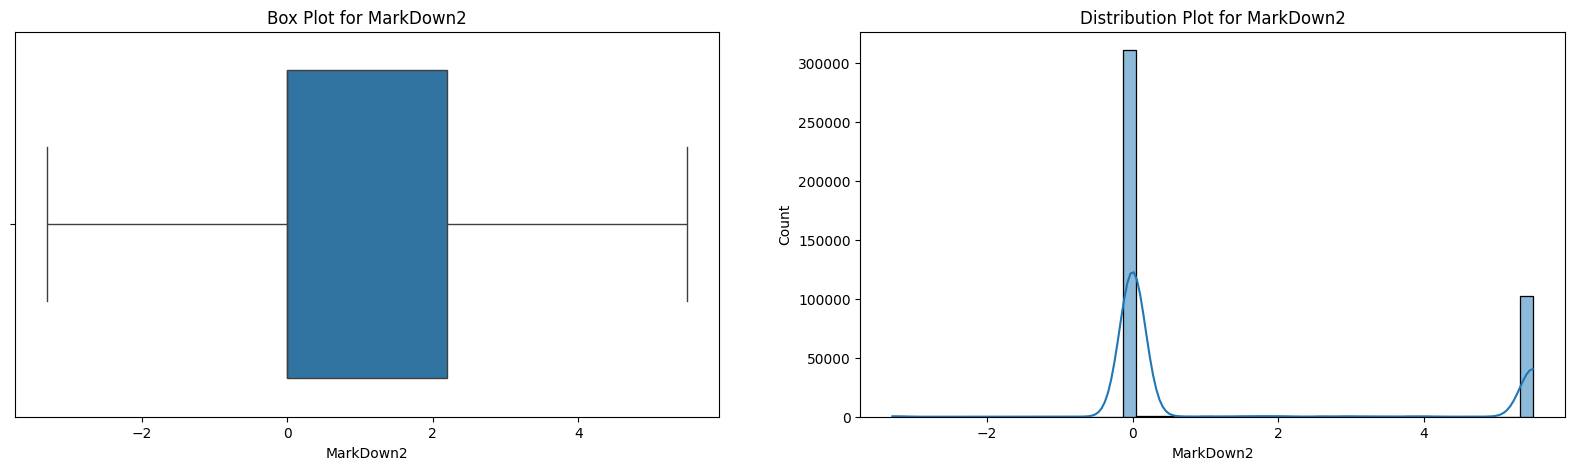

In [ ]:
outlier(df1, 'MarkDown2')
plot(df1, 'MarkDown2')

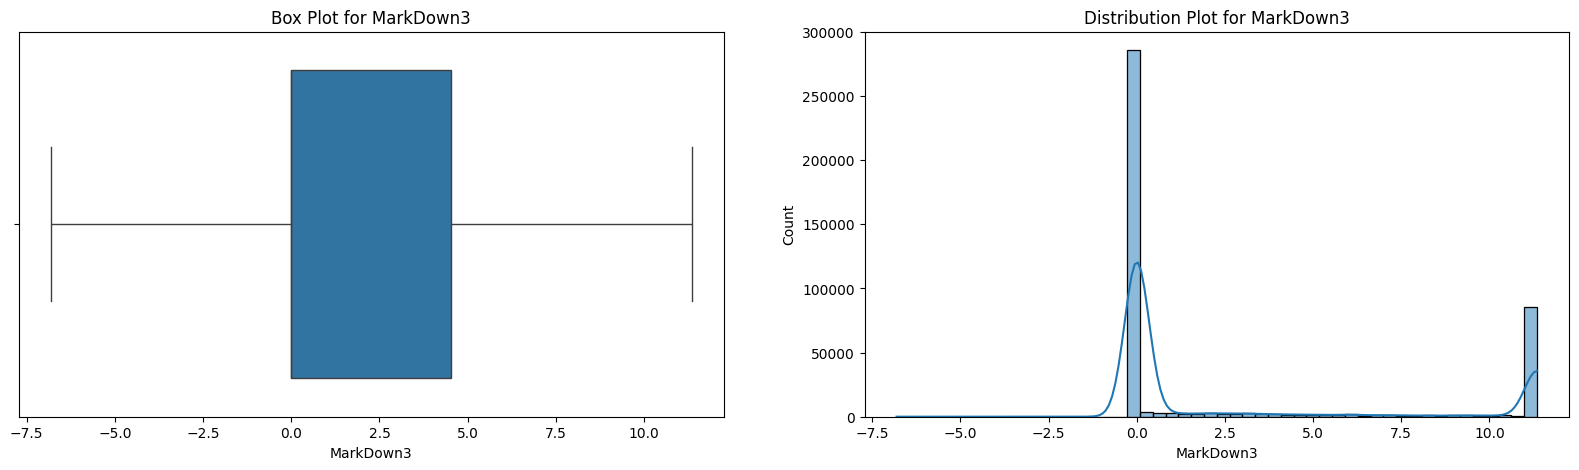

In [ ]:
outlier(df1, 'MarkDown3')
plot(df1, 'MarkDown3')

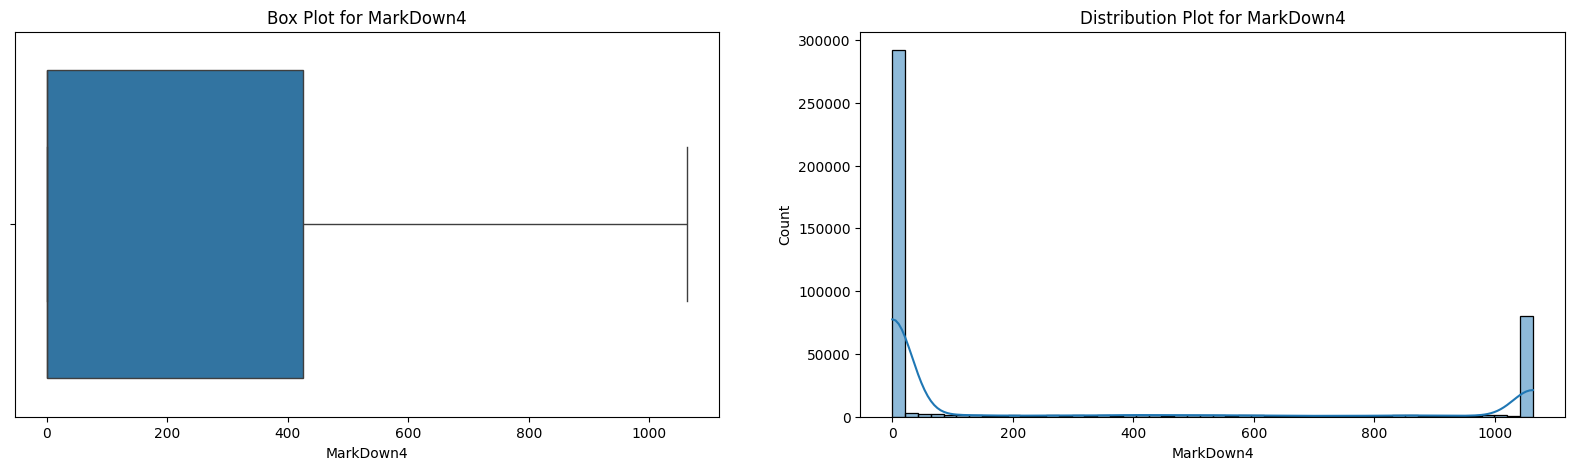

In [ ]:
outlier(df1, 'MarkDown4')
plot(df1, 'MarkDown4')

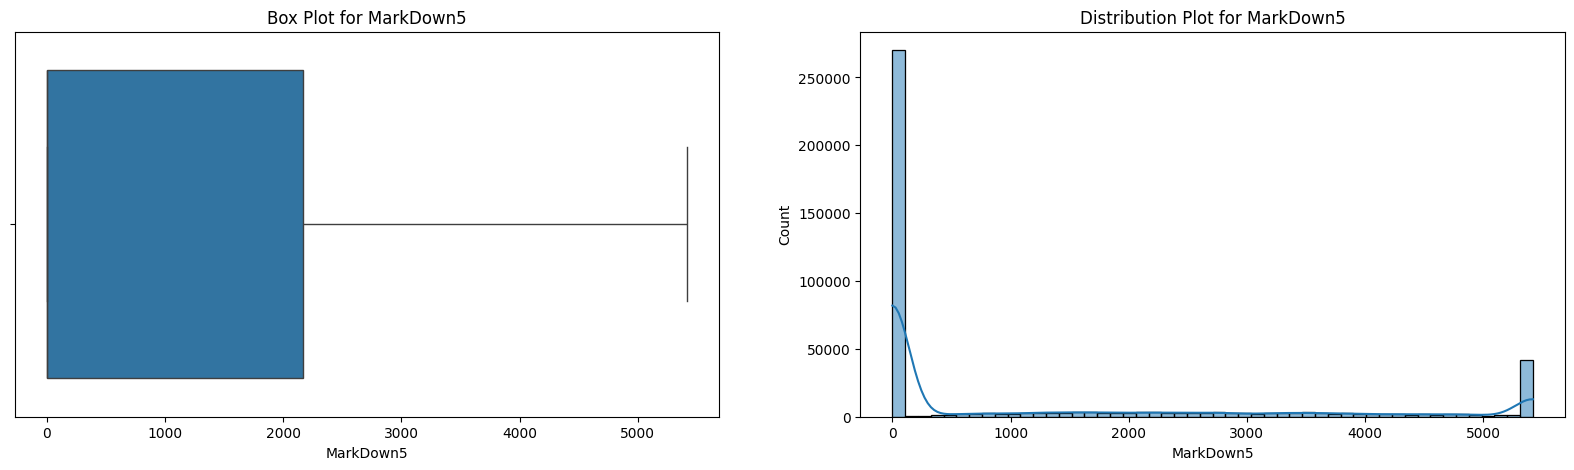

In [ ]:
outlier(df1, 'MarkDown5')
plot(df1, 'MarkDown5')

In [ ]:
iqr = df1['Weekly_Sales'].quantile(0.75) - df1['Weekly_Sales'].quantile(0.25)
upper_threshold = df1['Weekly_Sales'].quantile(0.75) + (1.5*iqr)
lower_threshold = df1['Weekly_Sales'].quantile(0.25) - (1.5*iqr)
iqr,upper_threshold,lower_threshold

(18126.2025, 47395.15625, -25109.653749999998)

In [ ]:
df1.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

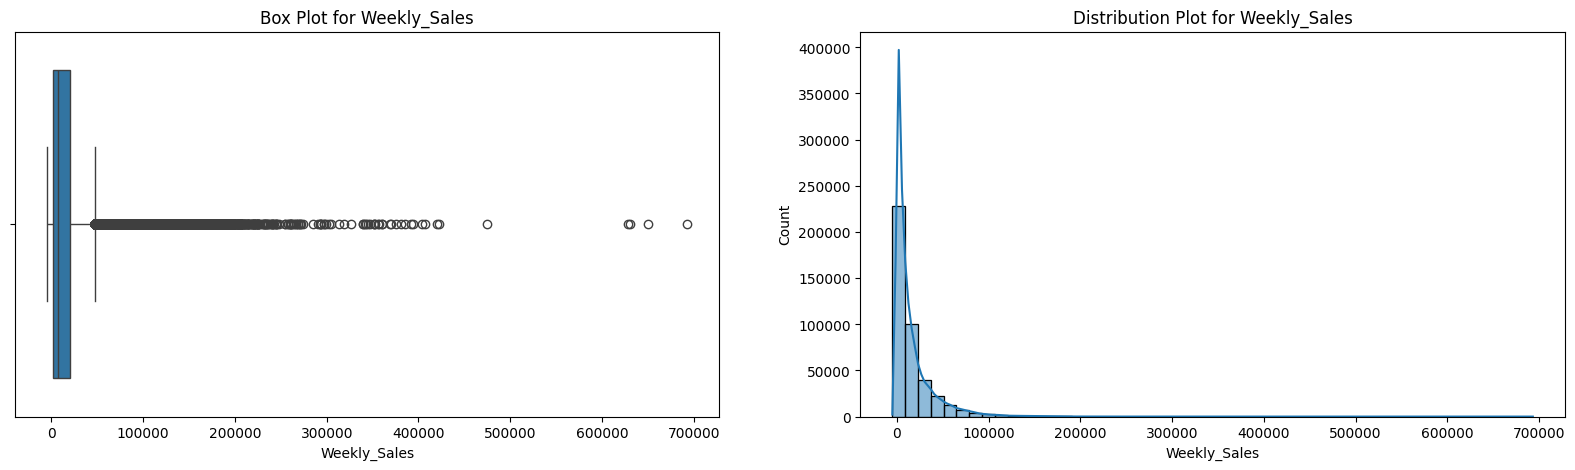

In [ ]:
plot(df1, 'Weekly_Sales')

In [ ]:
len(df1[df1['Weekly_Sales'] < 0])

1285

In [ ]:
len(df1[df1['Weekly_Sales'] >= 250000])

62

In [ ]:
df1.shape

(421570, 18)

In [ ]:
df1.drop(df1[df1['Weekly_Sales'] < 0].index, inplace=True)

In [ ]:
df1.drop(df1[df1['Weekly_Sales'] >= 250000].index, inplace=True)

In [ ]:
df1.shape

(420223, 18)

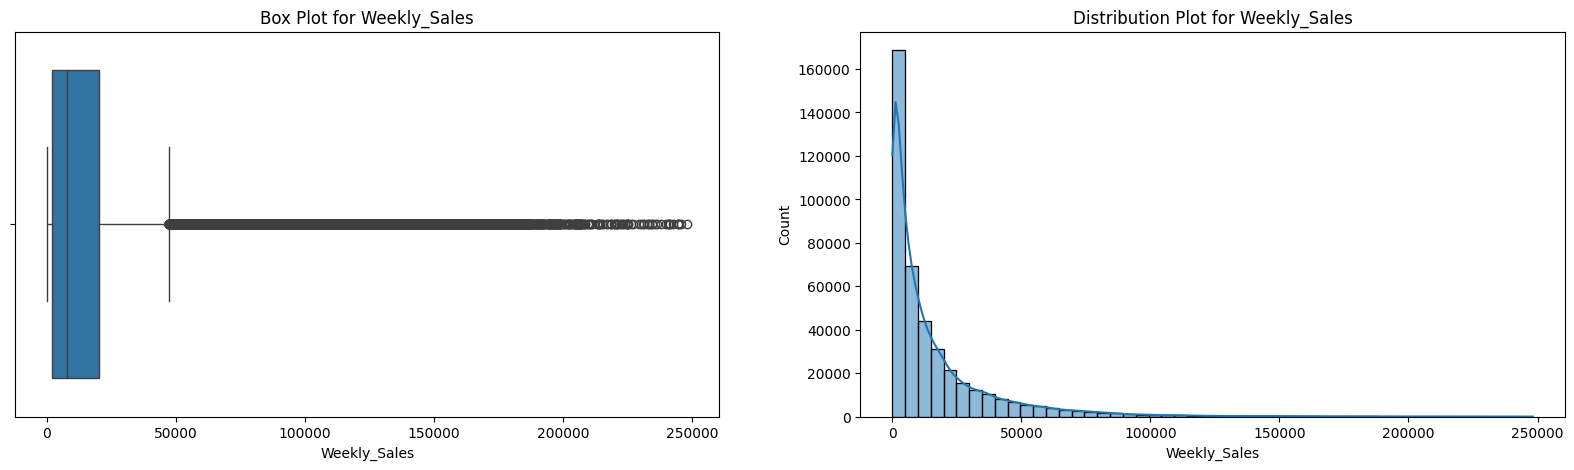

In [ ]:
plot(df1, 'Weekly_Sales')

# **Encoding**

In [ ]:
df1.head(2)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,month,year,day
0,1,A,151315.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,A,151315.0,2.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
columns=["Type", "IsHoliday_y"]
encode=LabelEncoder()

for column in columns:
  encode.fit(df1[[column]])
  df1[column] = encode.transform(df1[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
df1.head(2)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,month,year,day
0,1,0,151315.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,2010,5
1,1,0,151315.0,2.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,2010,5


# **Machine Learning**

In [ ]:
x=df1.drop("Weekly_Sales",axis=1)
y=df1["Weekly_Sales"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
Model1=LinearRegression().fit(x_train,y_train)
y_pred_train = Model1.predict(x_train)
y_pred_test = Model1.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.08963458242784439, 0.08916512136628008)

In [ ]:
from sklearn.svm import SVR
Model2=SVR().fit(x_train,y_train)
y_pred_train = Model2.predict(x_train)
y_pred_test = Model2.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
from sklearn import linear_model
Model3=linear_model.Lasso().fit(x_train,y_train)
y_pred_train = Model3.predict(x_train)
y_pred_test = Model3.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.08963441513698123, 0.0891627579629084)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model4=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_train = Model4.predict(x_train)
y_pred_test = Model4.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(1.0, 0.9610175905013079)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model5=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = Model5.predict(x_train)
y_pred_test = Model5.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9970390541091647, 0.9771264774430414)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model6=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = Model6.predict(x_train)
y_pred_test = Model6.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.7560085373814474, 0.7491360477297497)